In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%pip install seaborn

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv('kc_house_data.csv', sep=',')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### 1 задача

#### 1.1 Изучите распределение стоимости недвижимости

In [5]:
df['price'].value_counts()

350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64

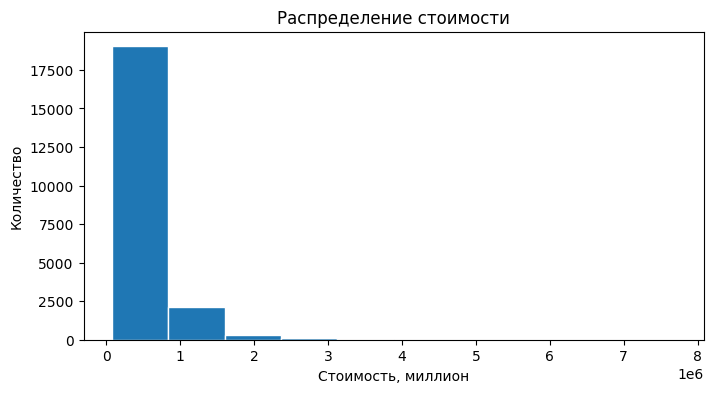

In [12]:
plt.figure(figsize=(8, 4))
plt.hist(df['price'], edgecolor='w')
plt.title('Распределение стоимости')
plt.xlabel('Стоимость, миллион')
plt.ylabel('Количество');

Больше всего домов встречается в диапазоне от 75 тысяч до 1 миллиона, незначительное кол-во домов со стоимостью от 3 до 8 миллионов

#### 1.2 Изучите распределение жилой квадратуры

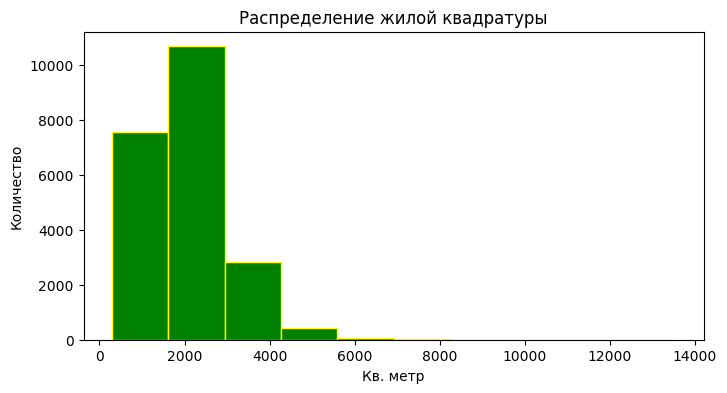

In [14]:
plt.figure(figsize=(8, 4))
plt.hist(df['sqft_living'], color='g', edgecolor='yellow')
plt.title('Распределение жилой квадратуры')
plt.xlabel('Кв. метр')
plt.ylabel('Количество');

В основном в домах жилая площадь варьируется от 300 до 4000 кв метров, больше всего домов с площадью около 2000 кв метров.

#### 2.4 Изучите распределение домов по годам постройки

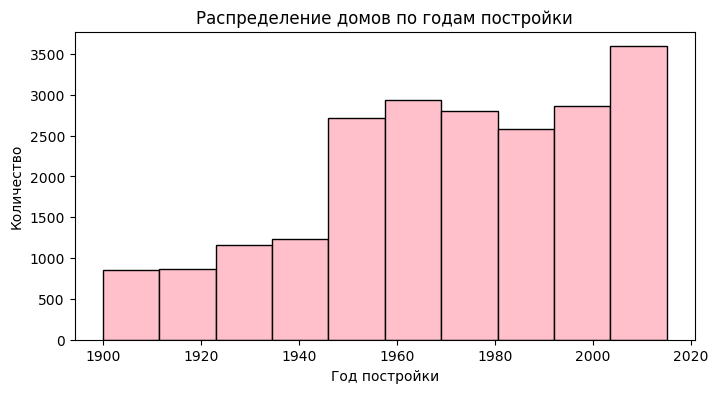

In [32]:
plt.figure(figsize=(8, 4))
plt.hist(df['yr_built'], color='pink', edgecolor='black')
plt.title('Распределение домов по годам постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество');

В среднем большинство домов были построены между 1940-ми и 2000 годом, меньше всего сохранилось домов с 1900-х по 1920-х годов постройки. После 1940-х резкий рост, скорее всего, объясняется окончанием WWII и экономическим развитием в 50-х. Начиная с приблизительно 1990-х до второй половины 2010-х наблюдается резкий рост строительства.

### 2 задача

#### 2.1 Изучите распределение домов от наличия вида на набережную

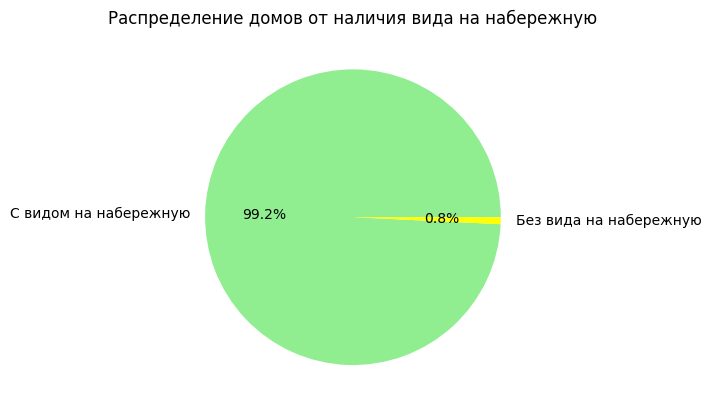

In [59]:
data = df['waterfront'].value_counts()

names = data.index
values = data.values

plt.pie(values, labels=('С видом на набережную', 'Без вида на набережную'),autopct='%.1f%%', 
        colors=['lightgreen', 'yellow'])
plt.title('Распределение домов от наличия вида на набережную');

Подавляющее большинство домов на продажу стоят с видом на набережную(99%), и только меньше 1% домов продаются без вида на набережную.

#### 2.2 Изучите распределение этажей домов

In [121]:
data = df['floors'].value_counts()
data

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

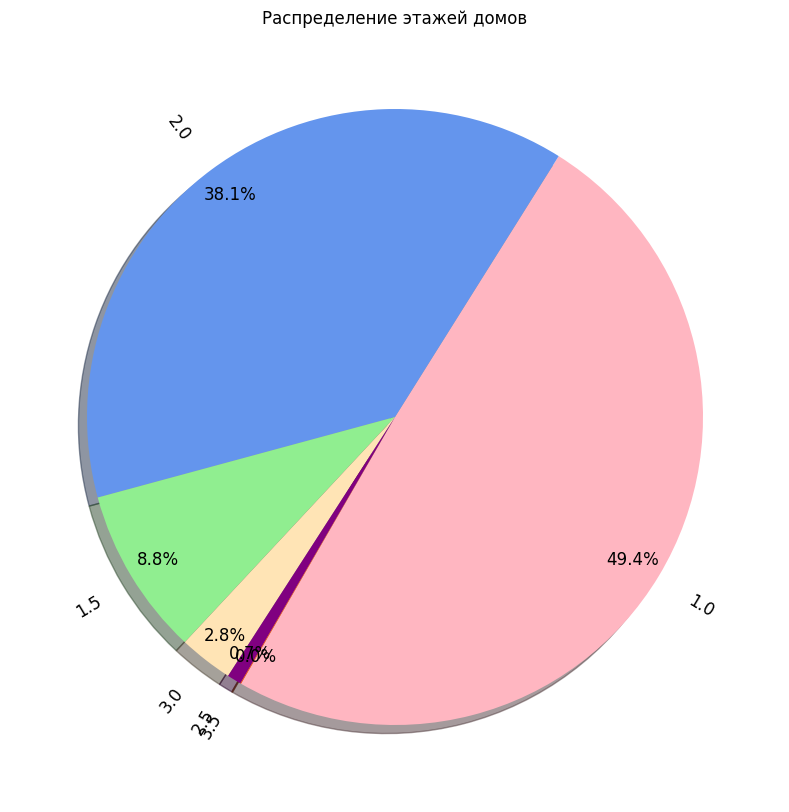

In [122]:
names = data.index
values = data.values
colors = ['lightpink','cornflowerblue','lightgreen','moccasin', 'purple', 'orangered']

plt.figure(figsize=(15,10))
plt.pie(values, labels=names, autopct='%.1f%%', pctdistance=0.9, shadow=True, colors=colors,
        startangle= 240, textprops={'fontsize': 12}, rotatelabels=True)
plt.title('Распределение этажей домов');

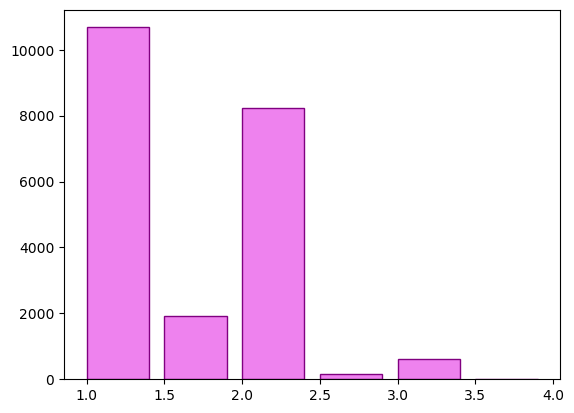

In [123]:
# С помощью столбчатой диаграмы
plt.bar(names, values, width=0.4, 
        color='violet', edgecolor='purple', align='edge');

Почти половина домов (49% или больше 10 тысяч) - одноэтажные, больше трети количества домов являются двухъэтажными, всего лишь 2,8% трехэтажными, остальные значения распределены между 1.5, 2.5, 3.5 этажностью домов

#### 2.3 Изучите распределение состояния домов

In [124]:
data = df['condition'].value_counts()
data

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

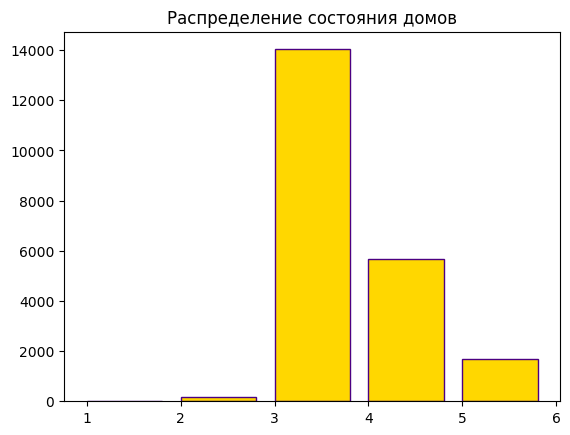

In [125]:
names = data.index
values = data.values

plt.bar(names, values, width=0.8, 
        color='gold', edgecolor='indigo', align='edge')
plt.title('Распределение состояния домов');

У большинства домов удовлетворительное состояние, у приблизительно трети домов состояние хорошее и отличное, совсем мало домов с неудовлетворительным состоянием

### 3 задача

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [149]:
# 1 диаграмма
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

<ipython-input-149-3725473c759d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
from matplotlib import colormaps
# list(colormaps)

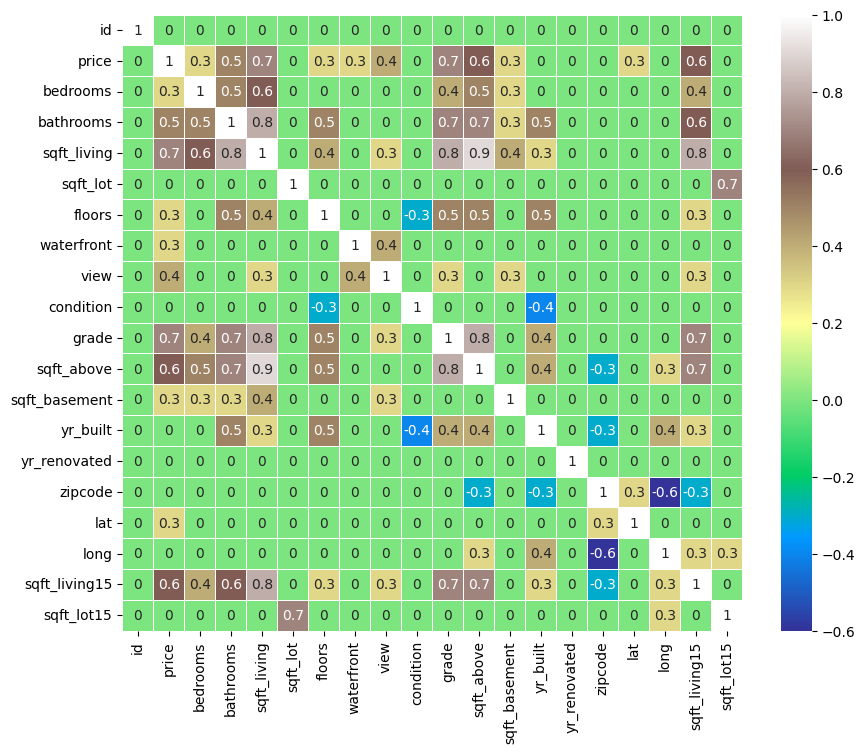

In [161]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='terrain');

Из данной матрицы явно прослеживается сильная корреляция стоимости дома и жилой площади, стоимости и состояния дома, стоимости и общей площади, а также стоимости дома и квадратных метров у 15 соседей. Немного слабее прослеживается корреляция между стоимостью дома и ванными + спальнями, стоимостью и этажностью, стоимостью и наличием вида на набережную, стоимостью и наличием подвала, а также стоимостью дома и широты, на которой дом стоит

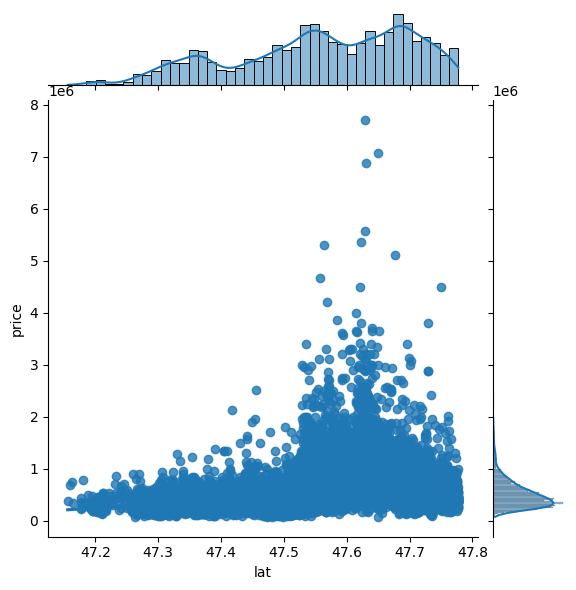

In [163]:
# 2 диаграмма

sns.jointplot(x=df['lat'], y=df['price'], kind='reg');

По данному графику видно, что больше всего домов стоимостью свыше 1 млн расположилось между 47.5 и 47.8 градусов широты, следовательно, некая зависимость присутствует

In [180]:
# 3 диаграмма

data = df.pivot_table(index='bathrooms',
                   values='price',
                   aggfunc='sum')
data.head()

,price
bathrooms,
0.00,4.481600e+06
0.50,9.495000e+05
0.75,2.120550e+07
1.00,1.336803e+09
1.25,5.590950e+06


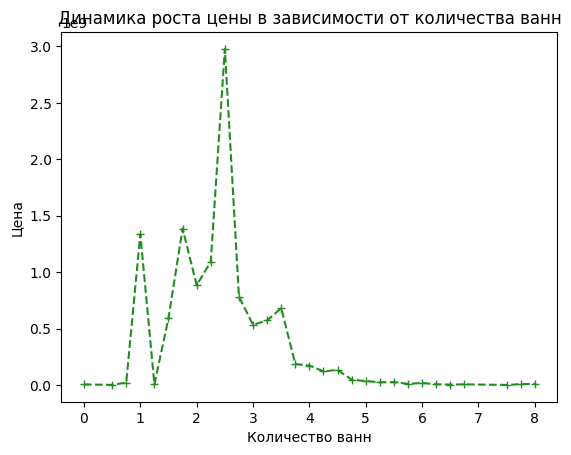

In [195]:
plt.plot(data['price'], linestyle='--', marker='+', color='forestgreen')
plt.title('Динамика роста цены в зависимости от количества ванн')
plt.xlabel('Количество ванн')
plt.ylabel('Цена');

В целом, на данном графике мы можем проследить рост суммы с ростом количества ванн, однако, после того, как количество стало больше 2.5, мы наблюдаем резкое падение цены, и далее она не увеличивается, а только падает, даже с ростом колличества ванн